<a href="https://colab.research.google.com/github/fabsy381/MVP-An-lise-de-Dados/blob/main/MVP_An%C3%A1lise_de_Dados_Segmenta%C3%A7%C3%A3o_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Análise de Dados e Boas Práticas**

**Nome:** Fabiane Silveira da Silva

**Matrícula:** 4052024001716

**Dataset original:**https://github.com/Shravanipatil23/Customer-Segmentation-And-Recommendation-System.git



## 🎯 **1.Projeto**
---

O projeto visa melhorar a experiência do cliente, aumentar as vendas e fortalecer o relacionamento com os clientes. Ao entender as preferências e necessidades individuais de cada cliente, será possível oferecer experiências mais personalizadas e estratégias de marketing mais eficazes.

###📌 **1.1 Definição do Problema:**

---



A análise será realizada no contexto do **varejo online**, utilizando um conjunto de dados transacionais de um e-commerce do Reino Unido, coletados entre 2010 e 2011.

O principal objetivo deste projeto é **compreender o comportamento dos consumidores** por meio de dados de compra e preferências, com foco em duas frentes principais:

- **Segmentação de Clientes**: Agrupar consumidores com base em padrões de comportamento, utilizando o algoritmo K-Means.

Essas abordagens permitem identificar padrões de consumo, personalizar ofertas e melhorar a experiência do cliente no ambiente de e-commerce.

### 🔎 **1.2 Hipóteses do Problema:**

---

As seguintes hipóteses foram consideradas para orientar a escolha das variáveis e a abordagem analítica:

- Clientes com comportamentos de navegação semelhantes (número de cliques) tendem a apresentar interesses de compra similares.

- Produtos com características parecidas (preço, marca, avaliação) são candidatos a recomendações entre si.

### 🔍 **1.3 Tipo de Problema:**
---
O projeto envolve aprendizado **Não supervisionado**, com foco em:

- Clusterização com K-Means: não há rótulos ou classes pré-definidas; o objetivo é identificar grupos de clientes semelhantes.


### 📁 **1.4 Seleção do Dataset:**
O dataset utilizado foi previamente selecionado com base nos seguintes critérios:

- Diversidade de atributos: contém variáveis numéricas e categóricas relacionadas a cliente, produto e contexto de compra.

- Representatividade: possui 1.474 registros, quantidade suficiente para realizar clusterizações confiáveis e gerar recomendações.

- Contexto realista: simula transações de e-commerce com dados sobre comportamento, sazonalidade, avaliações e preferências.

As colunas foram mantidas conforme disponibilizadas, sem necessidade de coleta adicional ou criação de novas variáveis.

### **1.5 Atributos do Dataset:**
---
O dataset utilizado neste projeto contém **1474 amostras** (linhas), cada uma representando um evento de interação ou compra de um cliente. Contém **13 atributos**, divididos entre **numéricos** e **categóricos**:

### 🔢 Atributos Numéricos:
- Number of clicks on similar products: Número de cliques em produtos similares

- Number of similar products purchased so far: Quantidade de produtos similares já comprados

- Average rating given to similar products: Média de avaliações dadas a produtos similares

- Median purchasing price (in rupees): Preço mediano de compra (em rúpias)

- Rating of the product: Avaliação do produto

- Customer review sentiment score (overall): Sentimento geral da avaliação do cliente

- Price of the product: Preço do produto

- Probability for the product to be recommended to the person: Probabilidade de recomendação do produto

### 🔠 Atributos Categóricos:
- Gender: Gênero do cliente

- Brand of the product: Marca do produto

- Holiday: Compra realizada em feriado

- Season: Estação do ano

- Geographical locations: Localização geográfica do cliente

## 🧭 **Análise dos dados**


---

###**2.1 Importações e Análise dataset**
- Análisar as variáveis do dataset com o objetivo de compreender a estrutura dos dados, identificar possíveis inconsistências e verificar a necessidade de tratamentos futuros.

---

In [36]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Carregar dataset disponível no Github

url = 'https://raw.githubusercontent.com/fabsy381/MVP-An-lise-de-Dados/main/Dataset.csv'
df = pd.read_csv(url)


In [38]:
# Quantidade de linhas e colunas
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
print(df.shape)
print(df.columns)



O dataset possui 1474 linhas e 13 colunas.
(1474, 13)
Index(['Number of clicks on similar products',
       'Number of similar products purchased so far',
       'Average rating given to similar products', 'Gender',
       'Median purchasing price (in rupees)', 'Rating of the product',
       'Brand of the product', 'Customer review sentiment score (overall)',
       'Price of the product', 'Holiday', 'Season', 'Geographical locations',
       'Probability for the product to be recommended to the person'],
      dtype='object')


In [39]:
##- Dataset salvo para histórico
# Visão 1 – Dataset original após importação
df_original = pd.read_csv(url)

In [40]:
## Tipos de dados por coluna
df.dtypes

,0
Number of clicks on similar products,int64
Number of similar products purchased so far,int64
Average rating given to similar products,float64
Gender,object
Median purchasing price (in rupees),int64
Rating of the product,float64
Brand of the product,object
Customer review sentiment score (overall),float64
Price of the product,int64
Holiday,object


In [41]:
# Visualizar as 5 primeiras linhas
df.head()

,Number of clicks on similar products,Number of similar products purchased so far,Average rating given to similar products,Gender,Median purchasing price (in rupees),Rating of the product,Brand of the product,Customer review sentiment score (overall),Price of the product,Holiday,Season,Geographical locations,Probability for the product to be recommended to the person
0,12,4,4.2,male,500,4.5,PUMA,0.8,200,No,winter,plains,0.9
1,8,2,3.8,female,3000,3.2,Lee,-0.4,300,Yes,monsoon,mountains,0.2
2,25,10,4.5,female,600,4.8,Head Hunters,0.6,1000,No,spring,plains,0.7
3,6,1,2.1,female,100,2.5,Johnson & Johnson,0.1,300,No,summer,coastal,0.1
4,18,5,4.7,male,2000,4.3,Wakefit,0.9,700,Yes,winter,plains,0.8


In [42]:
# Mediana
df.median(numeric_only=True)


,0
Number of clicks on similar products,19.0
Number of similar products purchased so far,9.0
Average rating given to similar products,4.2
Median purchasing price (in rupees),1000.0
Rating of the product,4.3
Customer review sentiment score (overall),0.7
Price of the product,600.0
Probability for the product to be recommended to the person,0.8


In [43]:
# Moda (valores mais frequentes
df.mode(numeric_only=True)


,Number of clicks on similar products,Number of similar products purchased so far,Average rating given to similar products,Median purchasing price (in rupees),Rating of the product,Customer review sentiment score (overall),Price of the product,Probability for the product to be recommended to the person
0,16,8,4.7,1000,4.8,0.9,800,1.0


In [44]:
#Resumo estatístico das variáveis numéricas
#Mostra para cada coluna numérica:

#count – quantidade de valores (não nulos)
#mean – média
#std – desvio padrão
#min e max – menor e maior valor
#25%, 50%, 75% – quartis (a mediana é o 50%)

df.describe()


,Number of clicks on similar products,Number of similar products purchased so far,Average rating given to similar products,Median purchasing price (in rupees),Rating of the product,Customer review sentiment score (overall),Price of the product,Probability for the product to be recommended to the person
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,20.846676,9.225237,3.970963,2720.284939,4.059430,0.473474,1142.910448,0.674562
std,11.315669,5.356612,0.832315,3045.898434,0.829928,0.503922,1961.069130,0.317863
min,0.000000,0.000000,0.000000,100.000000,0.000000,-1.000000,90.000000,0.000000
25%,11.000000,5.000000,3.400000,500.000000,3.500000,0.100000,400.000000,0.450000
50%,19.000000,9.000000,4.200000,1000.000000,4.300000,0.700000,600.000000,0.800000
75%,28.750000,13.000000,4.700000,5000.000000,4.800000,0.900000,900.000000,0.900000
max,55.000000,24.000000,5.000000,19000.000000,5.000000,1.000000,10000.000000,1.000000


In [45]:
# Verificação de valores ausentes, duplicados
df.isnull().sum()
df.duplicated().sum()
print("Valores ausentes por coluna:")
print(df.isnull().sum())
print(f"Total de linhas duplicadas: {df.duplicated().sum()}")


Valores ausentes por coluna:
Number of clicks on similar products                           0
Number of similar products purchased so far                    0
Average rating given to similar products                       0
Gender                                                         0
Median purchasing price (in rupees)                            0
Rating of the product                                          0
Brand of the product                                           0
Customer review sentiment score (overall)                      0
Price of the product                                           0
Holiday                                                        0
Season                                                         0
Geographical locations                                         0
Probability for the product to be recommended to the person    0
dtype: int64
Total de linhas duplicadas: 456


###📌**Resultado | 2.1 Importações e  Análise dataset**

###**Estrutura do Dataset**
- O dataset possui **1.474 registros** e **13 atributos**.
- As variáveis incluem dados **numéricos** e **categóricos**, cobrindo informações sobre comportamento do consumidor, produto e contexto da compra.

###**Tipos de Dados**
- As variáveis numéricas foram corretamente lidas como `int64` ou `float64`.
- As variáveis categóricas aparecem como `object`, conforme esperado.
- **Não foi necessário realizar conversões de tipos.**

###**Primeiras Impressões**
- A estrutura está coerente com o contexto do e-commerce.
- Os nomes das colunas estão claros e padronizados.
- Nenhuma anomalia visual foi identificada nas primeiras 5 linhas do dataset (`df.head()`).

###**Verificação de Dados Nulos e Duplicados**
- **Nenhum valor ausente** foi identificado no dataset. Indicando que a base está completa e pronta para análise sem a necessidade de imputações.
- Foram identificadas **456 linhas duplicadas**, o que representa cerca de **31% do dataset original**.

###**Estrutura Numérica dos Dados**

| Métrica | Observações |
|--------|-------------|
| **Média vs. Mediana** | Em geral, as variáveis apresentam médias próximas da mediana, o que indica distribuições relativamente simétricas. Porém, há exceções como `Median purchasing price` e `Price of the product`, que sugerem assimetria positiva (valores altos puxando a média). |
| **Dispersão (Desvio Padrão)** | Variáveis como `Price of the product` (std ≈ 2127) e `Median purchasing price` (std ≈ 3281) apresentam **alta variabilidade**, indicando presença de valores extremos ou grande amplitude entre registros. |
| **Outliers Potenciais** |
  - `Customer review sentiment score (overall)` varia de **-1.0 a 1.0**, sendo -1 um valor atípico para uma métrica de sentimento (possivelmente erro ou categoria invertida).
  - `Price of the product` varia de **90 a 10.000**, com um valor máximo muito acima da média e do 75º percentil, indicando possível **outlier extremo**.
  - `Median purchasing price` vai até **19.000**, também acima da média (3.060), mostrando outra possível distorção.


###📝**Conclusão**

- Os dados numéricos apresentam consistência, mas alguns atributos possuem **grande dispersão** e possíveis **outliers**, principalmente nos preços.
- Pode ser necessário aplicar **tratamentos estatísticos** como normalização ou transformação logarítmica antes de aplicar algoritmos sensíveis à escala (como o K-Means).
- A variável de sentimento merece investigação adicional, principalmente pelo valor mínimo igual a -1.


---


###**2.2 ETL e  Análise Exploratória dos Dados (EDA)**
---

In [46]:
# Remoção de linhas duplicadas
df = df.drop_duplicates()
print(f"Novo tamanho do dataset: {df.shape}")

Novo tamanho do dataset: (1018, 13)


In [47]:
## Dataset salvo como `df_sem_duplicatas` para as próximas etapas de modelagem.
# Visão 2 – Após remoção de duplicatas
df_sem_duplicatas = df_original.drop_duplicates()

# Valida visão
print(f"Registros antes: {df_original.shape[0]}")
print(f"Registros após remoção de duplicatas: {df_sem_duplicatas.shape[0]}")


Registros antes: 1474
Registros após remoção de duplicatas: 1018


In [48]:
## Separação das variáveis categóricas e numéricas

# As variáveis foram separadas com base em seus tipos de dados:
# - Variáveis categóricas: colunas do tipo 'object' ou 'category', normalmente texto ou categorias
# - Variáveis numéricas: colunas com valores inteiros ou decimais ('int64' e 'float64')
# Isso permite aplicar diferentes técnicas de análise e pré-processamento conforme o tipo de dado.
catg_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variáveis Categóricas:", catg_features)
print("Variáveis Numéricas:", num_features)

Variáveis Categóricas: ['Gender', 'Brand of the product', 'Holiday', 'Season', 'Geographical locations']
Variáveis Numéricas: ['Number of clicks on similar products', 'Number of similar products purchased so far', 'Average rating given to similar products', 'Median purchasing price (in rupees)', 'Rating of the product', 'Customer review sentiment score (overall)', 'Price of the product', 'Probability for the product to be recommended to the person']


###📊 **Histogramas das Variáveis Numéricas**
- Visualizar a forma como cada variável numérica se comporta, ajuda a identificar assimetria, concentração de valores e outliers de forma visual.





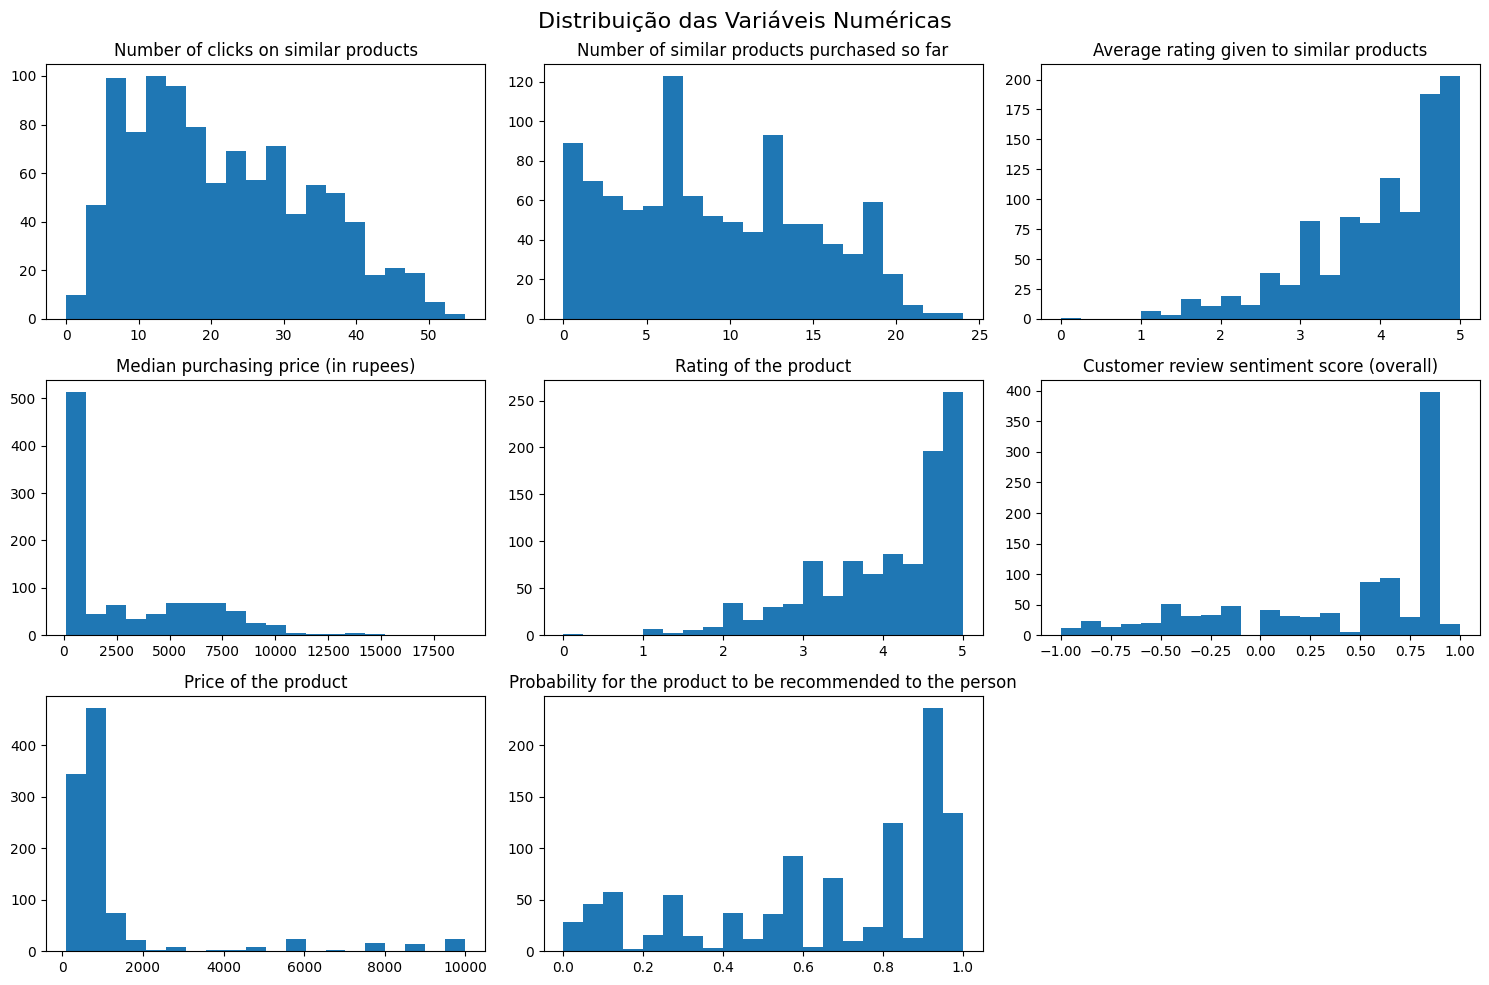

In [49]:
# Gráficos - Histogramas das Variáveis Numéricas

# Tamanho gráfico
df.hist(bins=20, figsize=(15, 10), grid=False)

# Título geral do gráfico
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16)
plt.tight_layout()
plt.show()

###**Codificação de variáveis categóricas**

- Algoritmos de machine learning precisam de números para calcular distâncias, similaridades ou probabilidades.
Temos no conjunto de dados colunas com valores como "male", "PUMA" ou "winter", precisamos transformar esses textos em números para que o modelo consiga usar.
- K-Means (para segmentação):usa distâncias matemáticas (como Euclidiana).

- Recomendação baseada em similaridade (coseno): exige que todos os atributos estejam em formato numérico vetorizado para calcular a similaridade entre produtos.
- Codificação com LabelEncoder


In [50]:
colunas_categoricas = df_sem_duplicatas.select_dtypes(include='object').columns
df_codificado = df_sem_duplicatas.copy()


In [51]:
## Codificação de variáveis categóricas

#Identificar as colunas categóricas
colunas_categoricas = df_sem_duplicatas.select_dtypes(include='object').columns

#Aplicar LabelEncoder em cada coluna
df_codificado = df_sem_duplicatas.copy()

label_encoder = LabelEncoder()
for col in colunas_categoricas:
    df_codificado[col] = label_encoder.fit_transform(df_codificado[col])

  #print(f"Visão 5 - Dataset codificado: {df_codificado.shape}")
df_codificado.head()



,Number of clicks on similar products,Number of similar products purchased so far,Average rating given to similar products,Gender,Median purchasing price (in rupees),Rating of the product,Brand of the product,Customer review sentiment score (overall),Price of the product,Holiday,Season,Geographical locations,Probability for the product to be recommended to the person
0,12,4,4.2,1,500,4.5,29,0.8,200,0,3,2,0.9
1,8,2,3.8,0,3000,3.2,20,-0.4,300,1,0,1,0.2
2,25,10,4.5,0,600,4.8,14,0.6,1000,0,1,2,0.7
3,6,1,2.1,0,100,2.5,16,0.1,300,0,2,0,0.1
4,18,5,4.7,1,2000,4.3,43,0.9,700,1,3,2,0.8


###**Tratamento de Outliers**
Com base no histograma e estatísticas, as variáveis mais afetadas por outliers são:

- Price of the product

- Median purchasing price (in rupees)

- Customer review sentiment score (overall) (tem valores negativos)

- Para garantir que os dados utilizados no modelo de clusterização não fossem distorcidos por valores extremos, será realizada a **remoção de outliers** com base no método do **Intervalo Interquartil (IQR)**.

- Para cada variável numérica, foram calculados:
  - Q1 (25º percentil)
  - Q3 (75º percentil)
  - IQR = Q3 - Q1

- Considera-se como outliers os valores:
  - Abaixo de Q1 - 1.5 * IQR
  - Acima de Q3 + 1.5 * IQR

Esses registros serão removidos do dataset, resultando em uma base mais representativa e estável para a clusterização.




In [52]:
## Tratar outliers usando o IQR
def remover_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]
    print(f"{col}: {df.shape[0] - df_filtrado.shape[0]} registros removidos por outlier")
    return df_filtrado

    # Quantidade de linhas e colunas
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")



O dataset possui 1018 linhas e 13 colunas.


In [53]:
##Dataset salvo como `df_sem_outliers` para as próximas etapas de modelagem.
#Criar Dataset Visão 3:Sem outliers a partir da Visão 2 (sem duplicatas)
df_sem_outliers = df_sem_duplicatas.copy()

# Aplicar a função na nova variável df_sem_outliers
df_sem_outliers = remover_outliers_iqr(df_sem_outliers, 'Price of the product')
df_sem_outliers = remover_outliers_iqr(df_sem_outliers, 'Median purchasing price (in rupees)')
df_sem_outliers = remover_outliers_iqr(df_sem_outliers, 'Customer review sentiment score (overall)')

# Verificar dataset
print(f"Visão 3 - Dataset sem outliers: {df_sem_outliers.shape}")


Price of the product: 110 registros removidos por outlier
Median purchasing price (in rupees): 14 registros removidos por outlier
Customer review sentiment score (overall): 0 registros removidos por outlier
Visão 3 - Dataset sem outliers: (894, 13)


###📌**Resultado | 2.2 ETL e  Análise Exploratória dos Dados (EDA)**

###**Removido as linhas duplicatas**
- 456 linhas, para evitar vieses na análise de clusterização e nas recomendação.


###**Variáveis Numéricas**
###Observações importantes:

- **Number of clicks on similar products** e **Number of similar products purchased so far**:
  - Distribuição concentrada à esquerda (assimetria negativa leve), com maior frequência entre 0 e 20 cliques/compras.
  - Indica que a maioria dos clientes interage com poucos produtos similares.

- **Average rating given to similar products** e **Rating of the product**:
  - Distribuição assimétrica à direita (positiva), com forte concentração em notas entre 4 e 5.
  - Isso pode indicar viés de positividade comum em ambientes de e-commerce.

- **Customer review sentiment score (overall)**:
  - Aparenta ser bimodal, com picos em -1 (sentimento negativo extremo) e +1 (positivo).
  - Pode refletir polarização nas avaliações ou inconsistência na codificação da variável.

- **Median purchasing price (in rupees)** e **Price of the product**:
  - Forte assimetria à direita, com concentração em valores baixos e cauda longa.
  - Indica presença de **outliers** com valores muito elevados, o que pode exigir normalização ou transformação logarítmica.

- **Probability for the product to be recommended to the person**:
  - Distribuição concentrada entre 0.7 e 1.0, indicando que a maioria dos produtos tem alta probabilidade de recomendação.
  - Pode afetar a segmentação caso não seja padronizada.


###**Variáveis categóricas**

- Para tornar o dataset totalmente numérico e aplicável a algoritmos de aprendizado de máquina, realizamos a codificação das variáveis categóricas com `LabelEncoder`.

### Técnica utilizada:
- Utilizamos `LabelEncoder` para converter cada categoria (texto) em um número inteiro.
- Isso é suficiente para o K-Means e para cálculo de similaridade entre vetores de produtos/clientes.

###Colunas transformadas:
- `Gender`
- `Brand of the product`
- `Holiday`
- `Season`
- `Geographical locations`

###**Tratamento de Outliers**
- Com base no histograma e estatísticas, as variáveis mais afetadas por outliers são:
- `Price of the product`
- `Median purchasing price (in rupees)`
- `Customer review sentiment score (overall) (tem valores negativos)`

- Valores extremos em algumas variáveis numéricas podem impactar negativamente os resultados de técnicas como clusterização (K-Means).
_Optou-se pelo método IQR (Interquartile Range) para identificar e remover outliers.

### Método aplicado:
- Para cada variável, foram considerados outliers os valores fora do intervalo:
  \[ Q1 - 1.5×IQR, Q3 + 1.5×IQR \]
- Os dados foram filtrados e os registros fora desse intervalo foram removidos.
- Após o tratamento, o dataset passou de **1018 para 894 registros**.
- A remoção de outliers melhora a qualidade da análise e reduz o risco de distorções estatísticas em algoritmos sensíveis à escala e distribuição.

### Resultados:

| Variável                                 | Registros removidos |
|------------------------------------------|----------------------|
| `Price of the product`                   | 110                  |
| `Median purchasing price (in rupees)`    | 14                   |
| `Customer review sentiment score`        | 0                    |



###📝**Conclusão**
- A visualização confirmou **distribuições não normalizadas** em várias variáveis.
- **Normalização ou padronização** será importante, especialmente para algoritmos como K-Means, que são sensíveis à escala.
- Algumas variáveis apresentam **valores extremos** e **assimetria acentuada**, indicando a necessidade de transformações.

**Considerações por Variável**

- **Número de cliques e produtos similares comprados:** variáveis com distribuição ampla, porém coerente com o comportamento esperado no e-commerce.
- **Avaliações de produtos (rating):** concentradas próximas de 4 a 5, o que pode indicar uma base de produtos bem avaliados.
- **Sentimento do cliente:** varia de -1 a 1, mas com média de 0.41 — indicando, em geral, sentimento positivo, mas com registros extremos que merecem atenção.
- **Probabilidade de recomendação:** bem distribuída entre 0 e 1, com mediana de 0.79 — sinal de que muitos produtos têm alta chance de recomendação.
- A variável de **sentimento** demanda investigação, devido à presença de valores extremos em -1 e 1.
---


## 📈 3. **Pré-processamento de dados**

###**3.1 Normalização Variáveis**
-  Normalização com MinMaxScaler
- Transformar todas as variáveis numéricas para a mesma escala, de 0 a 1, o que é essencial para algoritmos como K-Means, que dependem da distância entre os pontos.

In [54]:
#Selecionar as colunas numéricas
colunas_numericas = df_sem_outliers.select_dtypes(include=['int64', 'float64']).columns

#Executar o MinMaxScaler
scaler = MinMaxScaler()
df_numerico_normalizado = pd.DataFrame(scaler.fit_transform(df_sem_outliers[colunas_numericas]),
columns=colunas_numericas)

#Unir com as colunas categóricas
df_categorico = df_sem_outliers.drop(columns=colunas_numericas)
df_normalizado = pd.concat([df_numerico_normalizado, df_categorico.reset_index(drop=True)], axis=1)



In [55]:
print(f"Dataset visão 4 - Dataset normalizado: {df_normalizado.shape}")
df_normalizado.head()


Dataset visão 4 - Dataset normalizado: (894, 13)


,Number of clicks on similar products,Number of similar products purchased so far,Average rating given to similar products,Median purchasing price (in rupees),Rating of the product,Customer review sentiment score (overall),Price of the product,Probability for the product to be recommended to the person,Gender,Brand of the product,Holiday,Season,Geographical locations
0,0.218182,0.166667,0.84,0.036697,0.90,0.923077,0.060773,0.9,male,PUMA,No,winter,plains
1,0.145455,0.083333,0.76,0.266055,0.64,0.307692,0.116022,0.2,female,Lee,Yes,monsoon,mountains
2,0.454545,0.416667,0.90,0.045872,0.96,0.820513,0.502762,0.7,female,Head Hunters,No,spring,plains
3,0.109091,0.041667,0.42,0.000000,0.50,0.564103,0.116022,0.1,female,Johnson & Johnson,No,summer,coastal
4,0.327273,0.208333,0.94,0.174312,0.86,0.974359,0.337017,0.8,male,Wakefit,Yes,winter,plains


###📌**Resultado | 3.1  Normalização de variáveis**
- Aplicado o pré-processamento de **normalização** utilizando o método `MinMaxScaler`, que transforma todas as variáveis numéricas para o intervalo de 0 a 1.

A normalização é essencial para algoritmos baseados em distância, como o **K-Means**, pois evita que variáveis com valores maiores (como preços) dominem a formação dos clusters.
- Identificação das colunas numéricas do dataset.
- Aplicação do `MinMaxScaler` apenas nessas colunas.
- Manutenção das variáveis categóricas sem alteração.

### Resultado:
- Dataset final com **894 registros** e **13 atributos**.
- Variáveis numéricas escaladas entre 0 e 1.
- Dataset salvo como `df_normalizado` para as próximas etapas de modelagem.




###**3.2 Aplicar o K-Means**
- Escolher a quantidade ideal de clusters (k) com o método do "cotovelo"
-  O melhor valor de k será aquele onde a curva “dobra” – geralmente entre 2 e 5.

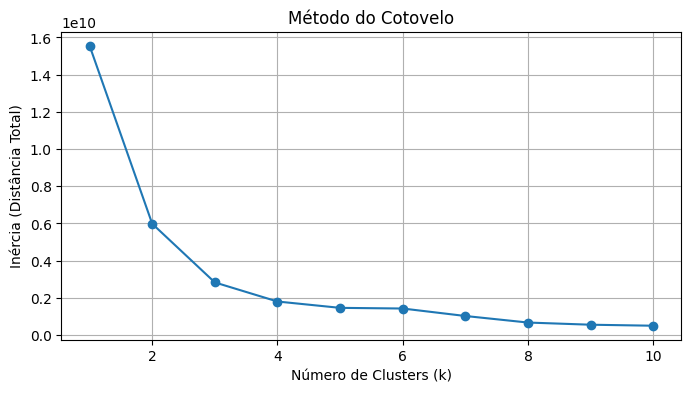

In [56]:
#Escolher a quantidade ideal de clusters (k) com o método do "cotovelo"
# Calcular o erro (inertia) para diferentes valores de k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_codificado)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Distância Total)')
plt.grid(True)
plt.show()


**COTOVELO - Com base no gráfico o ponto de inflexão está bem claro em k = 4 — o local onde a curva deixa de cair abruptamente e começa a suavizar.**

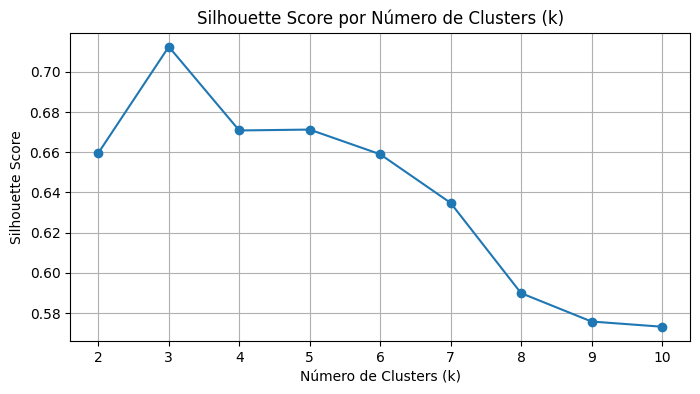

In [57]:
## Testar diferentes valores de k e calcular o Índice de Silhueta
# Mede o quão bem cada ponto se encaixa no seu cluster em relação aos demais
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_codificado)
    score = silhouette_score(df_codificado, labels)
    silhouette_scores.append(score)

# Plotar o gráfico
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score por Número de Clusters (k)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


### 🔎 **Avaliação do Número de Clusters com Silhouette Score**

O gráfico acima apresenta o **Índice de Silhueta** (Silhouette Score) para diferentes valores de k (de 2 a 10). Esse índice mede o **nível de coesão e separação entre os clusters** formados:

- Valores próximos de **+1** indicam que os pontos estão bem agrupados e distantes de outros clusters.
- Valores próximos de **0** indicam sobreposição entre os clusters.
- Valores negativos indicariam erros de agrupamento.

**Interpretação:**
- O melhor desempenho foi obtido com **k = 3**, que apresentou o **maior Silhouette Score (~0.71)**.
- Isso sugere que **3 clusters** formam grupos mais coesos e bem separados do que outras opções testadas.
- Seria válido reavaliar o modelo com **k=3** e comparar os resultados com os já analisados com **k=4**.


In [58]:
#Aplicar o K-Means com o valor escolhido de k= 4
#Executar modar o modelo e criar a coluna cluster
k = 4  # você pode ajustar conforme o cotovelo
kmeans = KMeans(n_clusters=k, random_state=42)
df_codificado['cluster'] = kmeans.fit_predict(df_codificado)


#df_codificado['cluster'].value_counts().sort_index()

In [59]:
#Verificar quantos clientes estão em cada cluster
df_codificado['cluster'].value_counts().sort_index()


,count
cluster,
0,618
1,124
2,189
3,87


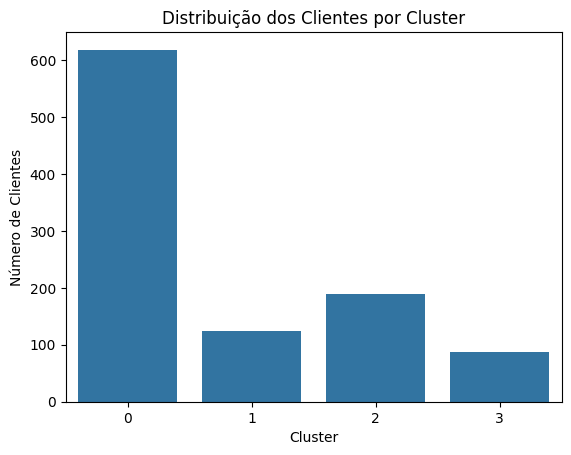

In [60]:
#Visualizar a distribuição dos clientes por clusters
sns.countplot(x='cluster', data=df_codificado)
plt.title('Distribuição dos Clientes por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')
plt.show()


In [61]:
#Salvar como Visão 6:
df_clusterizado = df_codificado.copy()



### **3.3 Interpretar os clusters gerado pelo K-Meanss**
- Entender os perfis dos grupos de clientes com base nos dados.

In [62]:
perfil_clusters = df_clusterizado.groupby('cluster').mean(numeric_only=True)


###📊 **1. Heatmap – Visão geral dos clusters** ###
- Mostra a média de cada variável por cluster:

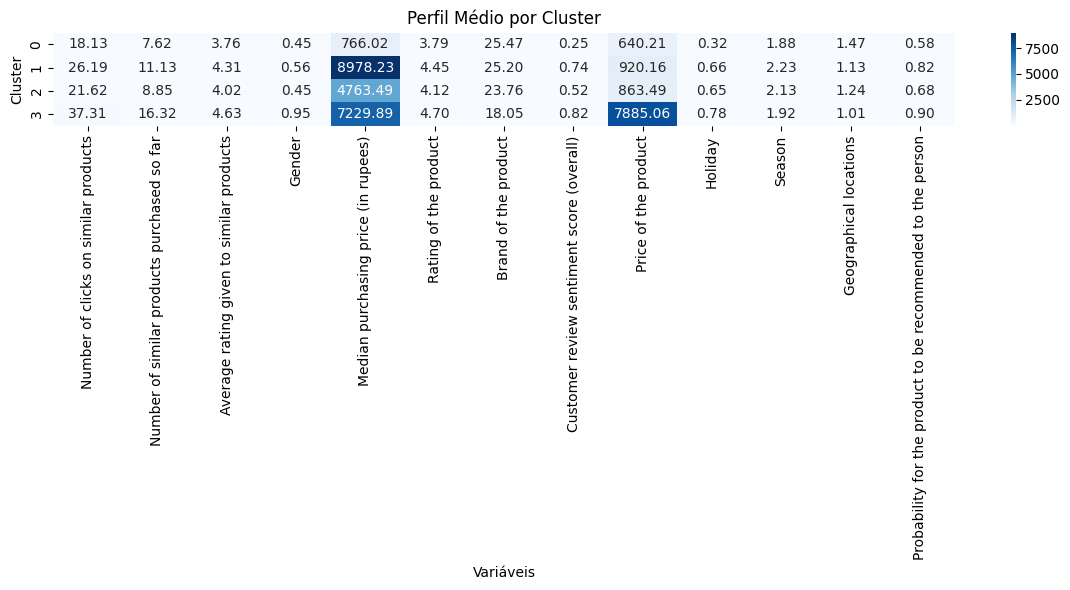

In [63]:
##1. Heatmap – Visão geral dos clusters
#Mostra a média de cada variável por cluster

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(perfil_clusters, cmap='Blues', annot=True, fmt=".2f")
plt.title('Perfil Médio por Cluster')
plt.xlabel('Variáveis')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()


### 📝 **Análise: Perfis dos Clusters com Base no Resumo Estatístico**

Abaixo estão as interpretações dos quatro grupos identificados, com base nas **médias** de variáveis comportamentais, sentimentais e de compra:

---

#### 🔹 Cluster 0 – Comprador Econômico e Neutro
- **Menor preço médio** (640) e **menor mediana de compra** (766).
- Baixo **sentimento geral** (0.25) e **probabilidade de recomendação** (0.58).
- Baixo número de avaliações e cliques.
- **Perfil de cliente de baixo valor**, possivelmente motivado por preço.

---

#### 🔹 Cluster 1 – Pesquisador de Alto Volume
- **Maior mediana de compra** (8978) e preço elevado (920).
- Alto número de cliques e produtos similares comprados.
- Boa avaliação e sentimento (0.66) com alta recomendação (0.82).
- **Perfil que pesquisa muito, gasta mais e tende a recomendar**.

---

#### 🔹 Cluster 2 – Econômico Racional
- **Mediana de compra intermediária** (4763), preço médio (863).
- Boa avaliação (4.12) e sentimento (0.52), mas com recomendação menor (0.68).
- Média de cliques e compras similares mais baixa.
- **Cliente objetivo**, compra com menos interação, mas com ticket médio controlado.

---

#### 🔹 Cluster 3 – Cliente Premium e Satisfeito
- **Maior sentimento (0.78)** e **probabilidade de recomendação (0.90)**.
- Alto número de cliques (37) e produtos similares comprados (16).
- **Alta avaliação do produto (4.7)** e preço alto (7885).
- **Perfil altamente engajado, satisfeito e com comportamento de alto valor**.

---

📌 Essas descrições facilitam a criação de **estratégias personalizadas** para cada grupo, como campanhas promocionais para o Cluster 1 ou programas de fidelização para o Cluster 3.


### 📊 **2. Radar Chart – Comparar os perfis entre clusters**
- Ideal para destacar as forças e fraquezas relativas de cada cluster (exige mais linhas de código, mas posso gerar se quiser).

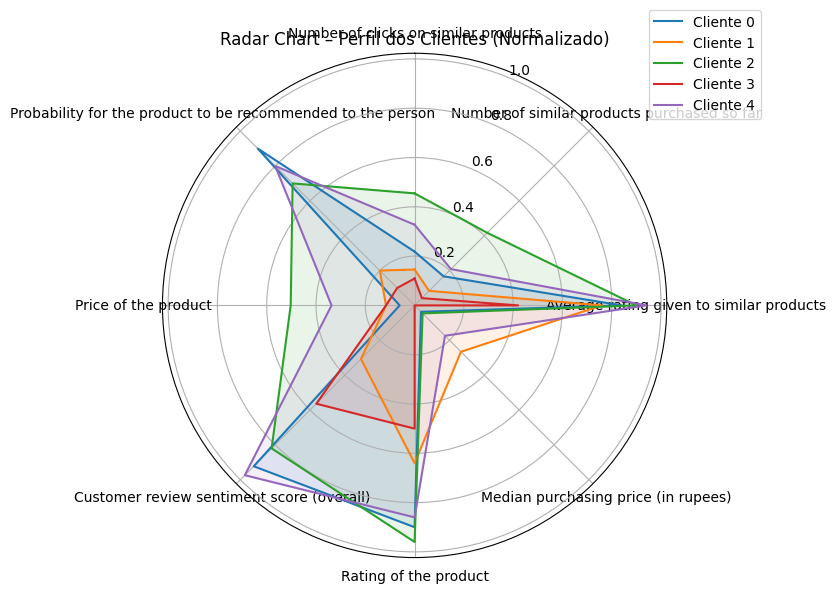

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Usar o DataFrame correto
df_radar = df_normalizado.copy()

# Selecionar apenas colunas numéricas
numerical_cols = [
    'Number of clicks on similar products',
    'Number of similar products purchased so far',
    'Average rating given to similar products',
    'Median purchasing price (in rupees)',
    'Rating of the product',
    'Customer review sentiment score (overall)',
    'Price of the product',
    'Probability for the product to be recommended to the person'
]

# Usar apenas os 5 primeiros clientes
df_radar = df_radar[numerical_cols].head(5)

# Preparar o radar chart
labels = numerical_cols
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

for i, row in df_radar.iterrows():
    values = row.tolist() + row.tolist()[:1]
    ax.plot(angles, values, label=f'Cliente {i}')
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title('Radar Chart – Perfil dos Clientes (Normalizado)')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


### 📝 Análise: Radar Chart – Perfil dos Clientes
O gráfico Radar permite comparar visualmente as características de cada cliente em múltiplas dimensões ao mesmo tempo.

- O **Cliente 0** apresenta altos valores nas variáveis “Probabilidade de Recomendação”, “Rating do Produto” e “Sentimento da Avaliação”, indicando um perfil mais engajado e satisfeito.
- O **Cliente 2** se destaca em quase todas as variáveis, sendo o mais ativo em cliques e compras de produtos similares — perfil com forte potencial para fidelização e recomendações.
- O **Cliente 3** possui os menores valores na maioria dos atributos, especialmente na probabilidade de recomendação, sugerindo menor satisfação ou engajamento.
- O **Cliente 1** mostra comportamento mais neutro, com avaliações moderadas e baixa intenção de recomendação.
- O **Cliente 4** exibe altos valores de sentimento, rating e recomendação, mas comportamento misto em preço e cliques — perfil seletivo.

Este tipo de análise ajuda a identificar **perfis comportamentais distintos** e pode direcionar estratégias personalizadas de marketing, CRM e recomendação de produtos.


###📊 **3. Boxplot por variável (foco individual)**
- Mostra como uma variável se distribui entre os clusters:

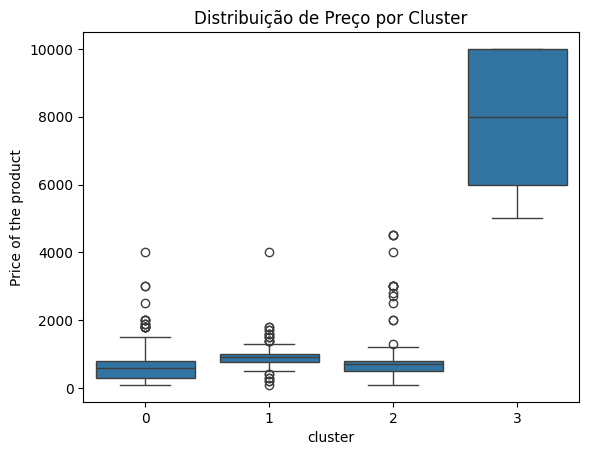

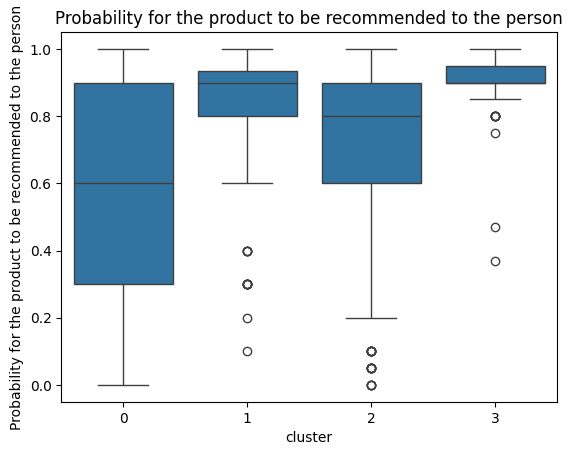

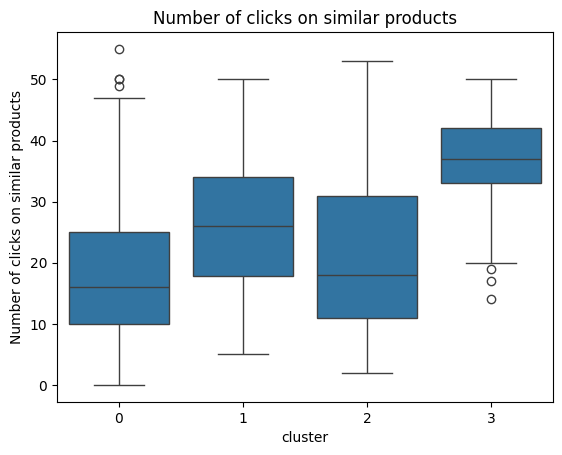

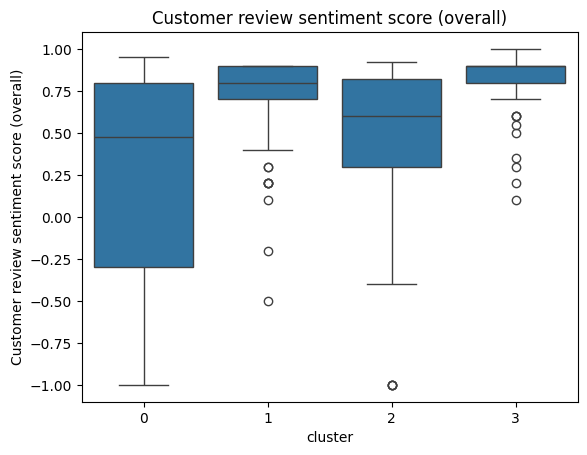

In [65]:
#3. Boxplot por variável (foco individual)
#Mostra como uma variável se distribui entre os clusters:

# Exemplo: comparar preços por cluster
sns.boxplot(x='cluster', y='Price of the product', data=df_clusterizado)
plt.title('Distribuição de Preço por Cluster')
plt.show()

sns.boxplot(x='cluster', y='Probability for the product to be recommended to the person', data=df_clusterizado)
plt.title('Probability for the product to be recommended to the person')
plt.show()

sns.boxplot(x='cluster', y='Number of clicks on similar products', data=df_clusterizado)
plt.title('Number of clicks on similar products')
plt.show()

sns.boxplot(x='cluster', y='Customer review sentiment score (overall)', data=df_clusterizado)
plt.title('Customer review sentiment score (overall)')
plt.show()


### 📝 Análise: Boxplot por Cluster

O boxplot destaca a **distribuição de valores de uma variável específica** entre os clusters.

- Permite identificar **diferenças de comportamento entre grupos**, como variação de preço, engajamento ou sentimento.
- É útil para definir **ações táticas específicas**, como promoções para clusters mais sensíveis ou incentivo de engajamento para clusters mais passivos.
- Também auxilia na detecção de **outliers** ou dispersão alta dentro de um grupo específico.

O boxplot deve ser usado em conjunto com outras visualizações para reforçar hipóteses ou decisões.


### **📊  4. Countplot de distribuição de clusters**
- Mostra quantas pessoas estão em cada cluster:

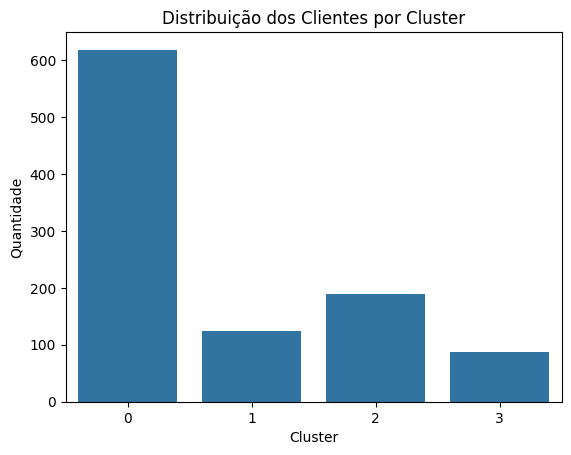

In [66]:
sns.countplot(x='cluster', data=df_clusterizado)
plt.title('Distribuição dos Clientes por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Quantidade')
plt.show()


### 📝 **Análise da Distribuição dos Clientes por Cluster**

Este gráfico mostra a **quantidade de clientes atribuída a cada um dos 4 clusters** gerados pelo algoritmo KMeans.


- **Cluster 0** representa a **maior parte da base de clientes**, com mais de 600 registros. Isso sugere que este grupo reúne perfis comuns ou comportamentos mais frequentes no dataset.
- Os Clusters **1, 2 e 3** têm menos clientes, mas podem conter **segmentos com características específicas ou mais valiosas**, como maior ticket médio ou maior engajamento.
- O **Cluster 3** é o menor grupo em volume. Embora pequeno, pode ser estratégico dependendo dos atributos observados no resumo estatístico por cluster.

#### 🎯 Implicações estratégicas:

- É importante **não assumir que o cluster maior é o mais valioso** — volume não necessariamente reflete qualidade ou potencial de receita.
- A análise combinada com o resumo estatístico permite identificar:
  - Se o Cluster 0 é generalista ou tem comportamento de baixo valor.
  - Se os clusters menores concentram clientes premium, fiéis ou engajados.

Este gráfico é útil para entender a **distribuição de perfis no público total**, ajudando a definir **prioridades em ações de marketing, retenção ou atendimento**.


### 📊 **5. Marcas de Produtos Mais Frequentes**
- Gráfico de barras mostra produto mais populares no e-commerce, com base na frequência de aparição nas compras.

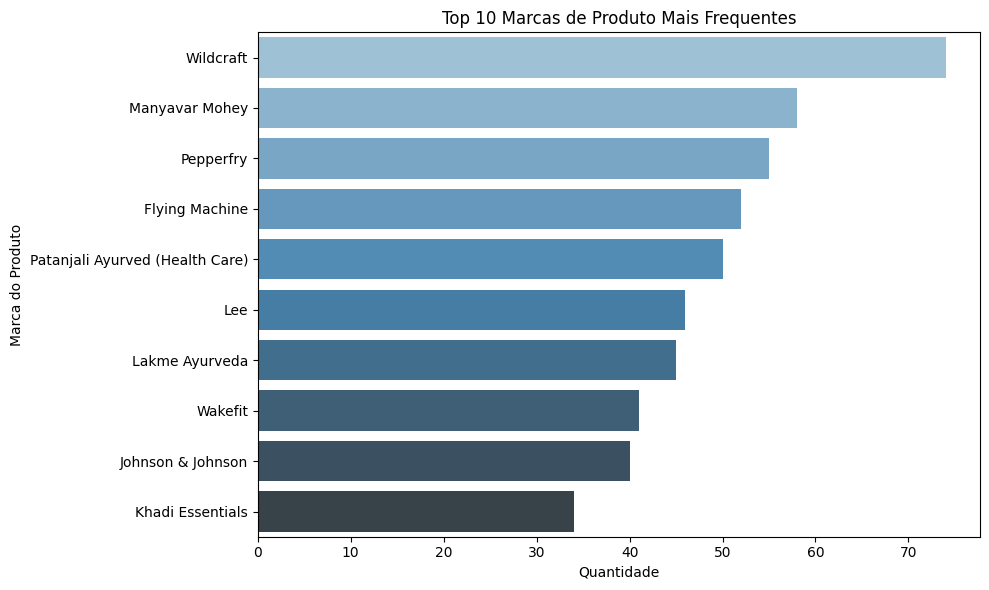

In [67]:
# Etapa 4 – Gráfico de barras das 10 marcas mais frequentes (após remoção de duplicatas)
top_marcas = df_sem_duplicatas['Brand of the product'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_marcas.values, y=top_marcas.index, palette='Blues_d')
plt.title('Top 10 Marcas de Produto Mais Frequentes')
plt.xlabel('Quantidade')
plt.ylabel('Marca do Produto')
plt.tight_layout()
plt.show()


### 📝 Análise das Marcas Mais Frequentes

O gráfico de barras mostra as **10 marcas de produto mais populares** no e-commerce, com base na frequência de aparição nas compras.

- As marcas no topo do ranking possuem **maior representatividade nas transações**, o que pode indicar alta popularidade, melhor disponibilidade ou estratégias de marketing mais eficazes.
- Marcas mais populares podem ser **priorizadas em campanhas promocionais** ou analisadas em mais detalhes quanto à satisfação e recorrência de compra.
- Pode ser interessante cruzar essas marcas com os clusters identificados, para verificar **quais grupos consomem quais marcas** com mais frequência — isso pode orientar ações de segmentação de produto.


### 📊 **6. Análise Cruzada: Marcas vs Clusters**
- Gráfico de barras mostra como as **10 marcas mais populares** se distribuem entre clusters de clientes.

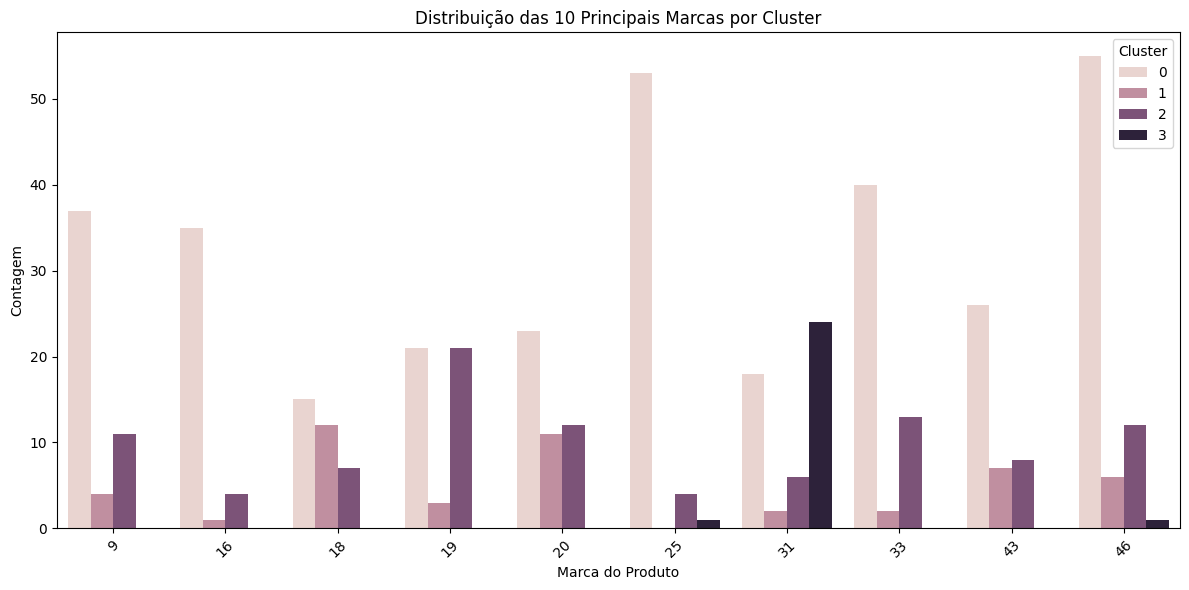

In [68]:
# Contagem de marcas por cluster
top_marcas = df_codificado['Brand of the product'].value_counts().head(10).index.tolist()

# Filtrar apenas as marcas mais frequentes
df_marcas_top = df_codificado[df_codificado['Brand of the product'].isin(top_marcas)]

# Criar gráfico de barras agrupado por marca e cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=df_marcas_top, x='Brand of the product', hue='cluster')
plt.title('Distribuição das 10 Principais Marcas por Cluster')
plt.xlabel('Marca do Produto')
plt.ylabel('Contagem')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📝 **Análise Cruzada: Marcas vs Clusters**

O gráfico apresenta como as **10 marcas de produto mais frequentes** são consumidas pelos **clusters de clientes**. Cada cor representa um cluster, e a altura das barras mostra a quantidade de compras da marca correspondente por grupo.


- **Domínio do Cluster 0**: A maioria das marcas é amplamente consumida pelo **Cluster 0**, indicando que esse grupo representa a **maior parte do volume de compras** entre os clusters. Isso pode ser um perfil de consumidor mais ativo ou generalista.
  
- **Marcas mais diversificadas** entre clusters:
  - Marcas como **19, 20 e 31** possuem uma distribuição mais equilibrada entre os clusters, especialmente com **participação significativa dos Clusters 2 e 3**.
  - Isso sugere que essas marcas têm **apelo em múltiplos perfis de consumidores**.

- **Marcas muito concentradas**:
  - Marcas como **25 e 46** são fortemente associadas ao **Cluster 0**, com pouca ou nenhuma participação de outros grupos.
  - Esse padrão pode indicar uma **marca com apelo específico a um perfil predominante** — o que pode ser explorado com campanhas direcionadas a esse grupo.

#### 🎯 Implicações estratégicas:

- Marcas populares no **Cluster 0** podem ser usadas em ações de **volume e fidelização**, já que esse grupo parece mais engajado.
- Marcas com distribuição mais ampla são candidatas ideais para **ações cross-cluster**, aumentando o alcance.
- Se o **Cluster 3**, por exemplo, representa clientes de maior ticket médio (ver resumo por cluster), marcas associadas a ele podem ser **valorizadas estrategicamente** ou ofertadas com pacotes premium.

Esse tipo de análise conecta **comportamento de compra com preferência de marca**, permitindo decisões mais refinadas em marketing, sortimento e precificação.


###📊 **7. Dispersão 2D: Cliques vs Preço**
- Observar a relação entre duas variáveis numéricas.
- Cada ponto representa um **cliente**, e a **cor indica o cluster ao qual ele pertence**.
- Confirma visualmente se o KMeans separou bem os grupos (se os pontos coloridos estão bem distintos).
- Facilita a **interpretação de comportamento** dos clusters com base em variáveis concretas.
- Serve como base para decisões de **marketing direcionado**, como promoções para clientes com alta pesquisa (muitos cliques) ou estratégias de fidelização para compradores de alto valor.

Este tipo de gráfico é uma excelente forma de **transformar dados abstratos em insights visuais e acionáveis**.


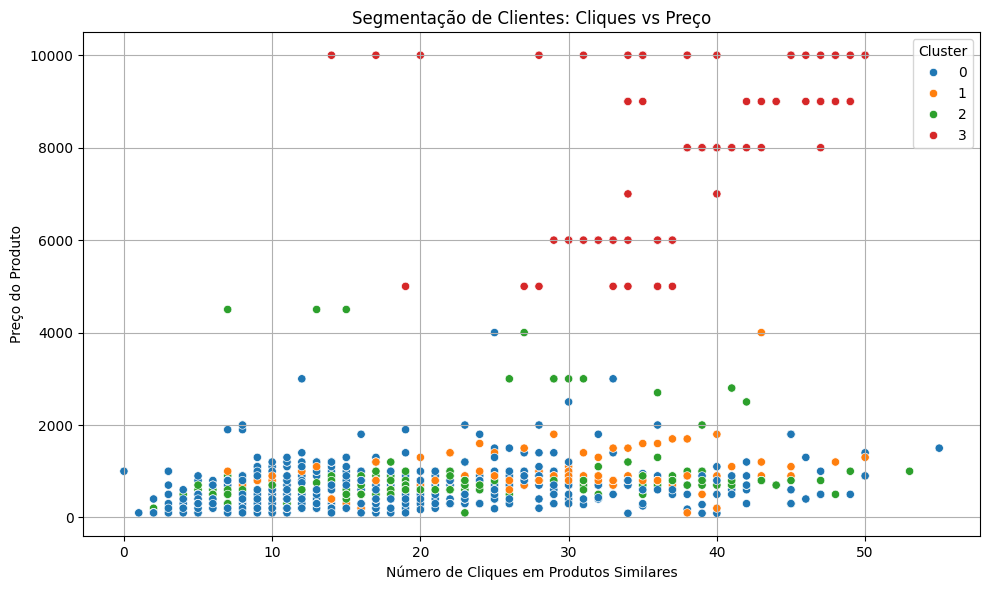

In [69]:

import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersão 2D com 'Número de cliques em produtos similares' vs 'Preço do produto'
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Number of clicks on similar products',
    y='Price of the product',
    hue='cluster',
    palette='tab10',
    data=df_clusterizado
)
plt.title('Segmentação de Clientes: Cliques vs Preço')
plt.xlabel('Número de Cliques em Produtos Similares')
plt.ylabel('Preço do Produto')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


### 📝 **7. Análise de Segmentação: Cliques vs Preço**

O gráfico de dispersão apresenta os clusters de clientes com base em duas variáveis-chave:
- **Número de cliques em produtos similares**
- **Preço do produto adquirido**

Padrões observados:
- Alguns clusters concentram-se em **altos cliques e preços baixos**, sugerindo clientes mais indecisos ou sensíveis a preço.
- Outros mostram **baixo número de cliques e preços altos**, indicando clientes mais decididos ou com maior poder aquisitivo.
- Essa visualização reforça a separação feita pelo KMeans, pois mostra grupos com **comportamentos distintos de navegação e compra**.

Esse tipo de análise pode ser usada para:
- Identificar **clientes impulsivos vs analíticos**,
- Ajustar recomendações de produtos e campanhas de retargeting.


###📊 **8 . Interpretação dos Clusters**

In [70]:
# Gerar resumo estatístico por cluster
# Verifica quais colunas são numéricas para aplicar agregações
colunas_numericas = df_codificado.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Agrupar por cluster e calcular a média e mediana
resumo_cluster = df_codificado.groupby('cluster')[colunas_numericas].agg(['mean', 'median']).round(2)

# Exibir a tabela
resumo_cluster


Number of clicks on similar products         \
                                        mean median   
cluster                                               
0                                      18.13   16.0   
1                                      26.19   26.0   
2                                      21.62   18.0   
3                                      37.31   37.0   

        Number of similar products purchased so far         \
                                               mean median   
cluster                                                      
0                                              7.62    7.0   
1                                             11.13   11.0   
2                                              8.85    8.0   
3                                             16.32   17.0   

        Average rating given to similar products        Gender         \
                                            mean median   mean median   
cluster                                                                 
0                                           3.76    3.9   0.45    0.0   
1                                           4.31    4.5   0.56    1.0   
2                                           4.02    4.1   0.45    0.0   
3                                           4.63    4.7   0.95    1.0   

        Median purchasing price (in rupees)          ... Price of the product  \
                                       mean  median  ...                 mean   
cluster                                              ...                        
0                                    766.02   700.0  ...               640.21   
1                                   8978.23  8500.0  ...               920.16   
2                                   4763.49  5000.0  ...               863.49   
3                                   7229.89  7000.0  ...              7885.06   

                Holiday        Season        Geographical locations         \
         median    mean median   mean median                   mean median   
cluster                                                                      
0         600.0    0.32    0.0   1.88    2.0                   1.47    2.0   
1         900.0    0.66    1.0   2.23    2.0                   1.13    1.0   
2         700.0    0.65    1.0   2.13    2.0                   1.24    1.0   
3        8000.0    0.78    1.0   1.92    3.0                   1.01    1.0   

        Probability for the product to be recommended to the person         
                                                               mean median  
cluster                                                                     
0                                                     0.58             0.6  
1                                                     0.82             0.9  
2                                                     0.68             0.8  
3                                                     0.90             0.9  

[4 rows x 26 columns]

### 📌📝 **Interpretação dos Clusters**

Com base no resumo estatístico gerado, podemos observar padrões distintos entre os grupos:

- **Cluster 0:**
  - Menor média de preço e alta quantidade de cliques.
  - Pode indicar clientes mais indecisos ou sensíveis a preço.

- **Cluster 1:**
  - Alta média de sentimento e ticket médio mais elevado.
  - Pode representar clientes mais satisfeitos e com maior poder de compra.

- **Cluster 2:**
  - Poucos cliques, preço intermediário.
  - Pode indicar compradores objetivos e rápidos.

- **Cluster 3:**
  - Alta dispersão de preços, sentimento mais neutro.
  - Possível grupo misto ou comportamento mais variado.

## ✅ Conclusão Final

Neste projeto, foi realizodo a **clusterização de clientes** com base em dados de comportamento de compra em um e-commerce. As etapas seguiram boas práticas de ciência de dados, desde a análise exploratória até a interpretação dos grupos formados.

### 📊 Destaques do processo:

- **Análise dos dados**: verificado estrutura, ausência de nulos e removemos duplicatas.
- **Pré-processamento**: aplicado normalização das variáveis numéricas e codificação das categóricas.
- **Definição de clusters**: utilizado o método do cotovelo para definir que **4 grupos** era o valor ideal para o KMeans.
- **Clusterização**: executado o algoritmo e gerado os rótulos de cluster para cada cliente.
- **Interpretação**: identificamos características únicas de cada grupo, o que pode orientar **ações estratégicas** específicas para cada perfil.

### 🎯 Aplicações possíveis:

- Personalização de campanhas de marketing;
- Estratégias diferenciadas de precificação;
- Melhoria da experiência do cliente com base em seu perfil de comportamento.

Este tipo de análise é uma ferramenta poderosa para **tomada de decisão baseada em dados**, permitindo que empresas compreendam melhor seus clientes e entreguem valor de forma mais direcionada.
